<h3>U2_003 - Lógica Difusa - Funciones de pertenencia</h3>

In [ ]:
# Librerías requeridas
import numpy as np
import matplotlib.pyplot as plt

En esta práctica se muestra el desarrollo
de una librería de python para lógica difusa.<br>
Una librería es un archivo que contiene la definición variadas funciones y parámetros que pueden ser posteriormente utilizadas.<br>
Una librería de python se construye en un archivo de texto con extensión .py y que comienza con el encabezado <br> #!/usr/bin/env python

<h4>1. Funciones de pertenencia básicas: singleton, triangular y trapezoidal</h4>

In [ ]:
#
# Función singleton(x, x0): función de pertenencia singleton.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   x0: valor de referencia (int, float)
# Retorna:
#   singleton(x, x0): float, si x es int, float.
#   singleton(x, x0): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def singleton(x, x0):
    if (type(x) is int) or (type(x) is float):
        if x == x0:
            m = 1.0
        else:
            m = 0.0
        return m
    elif (type(x) is np.ndarray):
    # Si es un arreglo, evalua para todos sus elementos.
        m = np.zeros(x.size)
        for i in range(x.size):
            if x[i] == x0:
                m[i] = 1.0
            else:
                m[i] = 0.0
        return m
    else:
        return -1


Con x0 5.0 el valor singleton de xtest  6.2  es 0.0


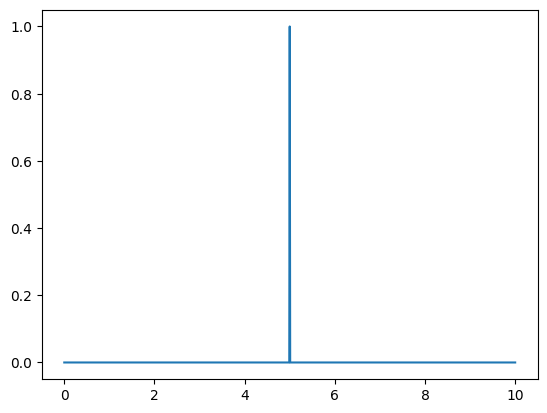

In [ ]:
# verificamos funcionamiento de la función...
# np.linspace(start, stop, num) genera un arreglo de num elementos que están
# distribuidos de manera uniforme entre start y stop (incluyendo ambos extremos).
x = np.linspace(0, 10, 1001)
x0 = 5.0
m = singleton(x, x0)
xtest = 6.2
print("Con x0", x0, "el valor singleton de xtest ",xtest," es", singleton(xtest, x0))
# plt.plot(x, m) crea un gráfico de línea donde:
#    x representa los valores en el eje horizontal (el eje x).
#    m representa los valores correspondientes en el eje vertical (el eje y).
plt.plot(x,m)
plt.show()

In [ ]:
#
# Función trimf(x, param): función de pertenencia triangular.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, c]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trimf(x, param): float, si x es int, float.
#   trimf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trimf(x, param):
    # param = [a, b, c]
    # a <= b <= c
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    if (a <= b) and (b <= c):
        if (type(x) is int) or (type(x) is float):
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)
            elif (b <= x) and (x <= c):
                m = (c - x)/(c - b)
            else:
                m = 0.0
            return m
        else:
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] <= a:
                   m[i] = 0.0
                elif (a <= x[i]) and (x[i] <= b):
                   m[i] = (x[i] - a)/(b - a)
                elif (b <= x[i]) and (x[i] <= c):
                   m[i] = (c - x[i])/(c - b)
                else:
                   m[i] = 0.0
            return m
    else:
        return -1


para xtest = 4.5 m(x) = 0.75


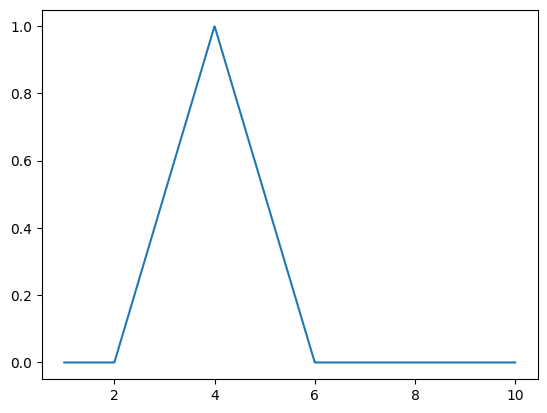

In [ ]:
# verificamos funcionamiento de la función...
x = np.linspace(1, 10, 1001)
a, b, c = 2, 4, 6
xtest = 4.5
m = trimf(x, [a, b, c])
plt.plot(x,m)
print("para xtest =", xtest, "m(x) =", trimf(xtest,[a, b, c]))

In [ ]:
#
# Función trapmf(x, [a, b, c, d]): función de pertenencia trapezoidal.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   [a, b, c, d]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c <= d
# Retorna:
#   valor de pertencia de x según función de pertenencia triangular.
#   trapmf(x, param): float, si x es int, float.
#   trapmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trapmf(x, param):
    # param = [a, b, c, d]
    # a <= b <= c <=d
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    d = float(param[3])
    if (a <= b) and (b <= c) and (c <= d):
        if (type(x) is int) or (type(x) is float):
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)
            elif (b <= x) and (x <= c):
                m = 1.0
            elif (c <= x) and (x <= d):
                m = (d - x)/(d - c)
            else:
                m = 0.0
            return m
        else:
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] < a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] < b):
                    m[i] = (x[i] - a)/(b - a)
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = 1.0
                elif (c < x[i]) and (x[i] <= d):
                    m[i] = (d - x[i])/(d - c)
                else:
                    m[i] = 0.0
            return m
    else:
        return -1


si xtest = 7.5 m(x) = 0.5


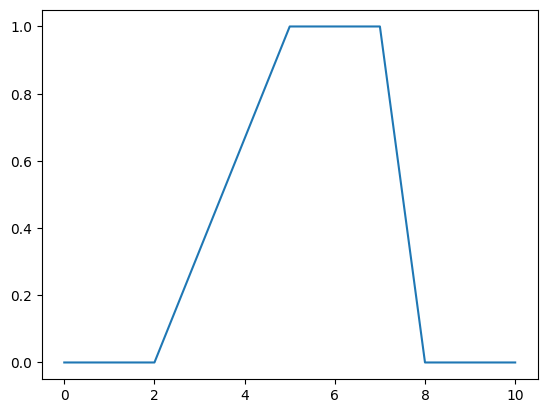

In [ ]:
# verificamos funcionamiento de la función...
# endpoint=True implica que el valor final de 10 se incluye en el array
x = np.linspace(0, 10, 1001, endpoint=True)
a, b, c, d = 2, 5, 7, 8
m = trapmf(x, [a, b, c, d])
xtest = 7.5
plt.plot(x,m)
print("si xtest =", xtest, "m(x) =", trapmf(xtest,[a, b, c, d]))

<h4>2 - Otras funciones de pertenencia</h4>
Tomando como ejemplo las funciones singleton, trimf y trapmf, construya las funciones gaussmf, gbellmf y sigmf.<br>
Verificar el funcionamiento de las funciones graficando según los códigos de prueba que se proponen.

In [ ]:

# Función gaussmf(x, param): función de pertenencia gaussiana.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [sig, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse sig > 0
#       param = [sig, x0], donde:
#       - sig: desviación estándar (debe ser mayor que 0)
#       - x0: media de la función
# Retorna:
#   valor de pertencia de x según función de pertenencia triangular.
#   gaussmf(x, param): float, si x es int, float.
#   gaussmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#

def gaussmf(x, param):
    # param = [sig, x0]
    # sig > 0
    sig = param[0]
    x0 = param[1]
    if (sig > 0):
        # pass
        # tu código
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):
            m = np.exp(-0.5*((x - x0)/sig)**2)
        else:
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = np.exp(-0.5*((x[i] - x0)/sig)**2)
        return m
    else:
        return -1

si xtest = 6 m(x) = 0.6065306597126334


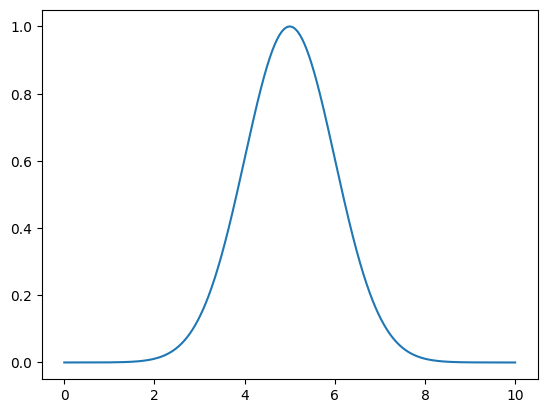

In [ ]:
## verificamos funcionamiento de la función...
x = np.linspace(0, 10, 1001, endpoint=True)
sig, x0 = 1, 5
m = gaussmf(x, [sig, x0])
xtest = 6
plt.plot(x,m)
print("si xtest =", xtest, "m(x) =", gaussmf(xtest,[sig, x0]))

In [ ]:
# Función gbellmf(x, param): función de pertenencia campana generalizada.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a, b > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gbellmf(x, param): float, si x es int, float.
#   gbellmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gbellmf(x, param):
    # param = [a, b, x0]
    # a, b > 0
    a = param[0]
    b = param[1]
    x0 = param[2]
    if (a > 0) and (b > 0):
        # pass
        # Ecriba aquí su código
        if (type(x) is int) or (type(x) is float):
            m = 1/(1+(abs((x - x0)/a)**(2*b)))
        else:
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = 1/(1+(abs((x[i] - x0)/a)**(2*b)))
        return m
    else:
        return -1


si xtest = 6 m(x) = 0.9961089494163424


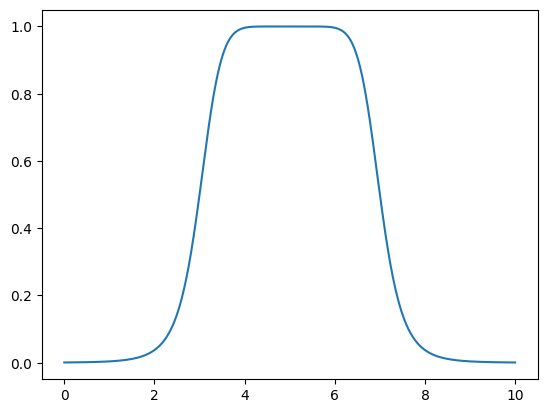

In [ ]:
# verificamos funcionamiento de la función...
x = np.linspace(0, 10, 1001)
a, b, x0 = 2, 4, 5
m = gbellmf(x, [a, b, x0])
xtest = 6
plt.plot(x,m)
print("si xtest =", xtest, "m(x) =", gbellmf(xtest,[a, b, x0]))

In [ ]:
#%%
#
# Función sigmf(): función de pertenencia sigmoidal.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   sigmf(x, param): float, si x es int, float.
#   sigmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def sigmf(x, param):
    # param = [a, x0]
    a = param[0]
    x0 = param[1]

    # escriba su código aquí
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):
        m = 1/(1+np.exp(-a*(x - x0)))
    else:
        m = np.zeros(x.size)
        for i in range(x.size):
            m[i] = 1/(1+np.exp(-a*(x[i] - x0)))
    return m


In [ ]:
#%%
#
# Función sigmf(): función de pertenencia sigmoidal.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   sigmf(x, param): float, si x es int, float.
#   sigmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def sigmfr(x, param):
    # param = [a, x0]
    a = param[0]
    x0 = param[1]

    # escriba su código aquí
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):
        m = 1/(1+np.exp(-a*(x - x0)))
    else:
        m = np.zeros(x.size)
        for i in range(x.size):
            m[i] = 1/(1+np.exp(-a*(x[i] - x0)))
    return 1-m


si xtest = 6 m(x) = 0.5


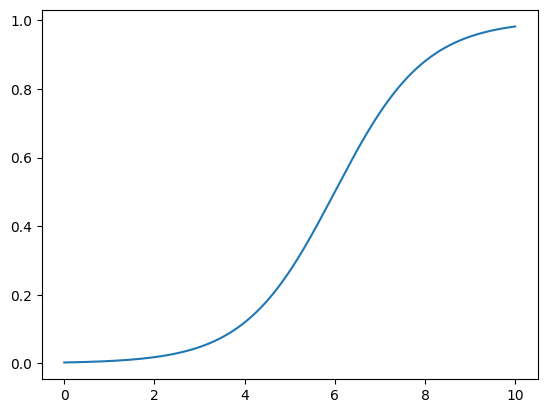

In [ ]:
# verificamos funcionamiento de la función...
x = np.linspace(0, 10, 1001)
a, x0 = 1, 6
xtest = 6
m = sigmf(x, [a, x0])
plt.plot(x,m)
print("si xtest =", xtest, "m(x) =", sigmf(xtest,[a, x0]))

<h2> Relaciones de funciones difusas </h2>

In [ ]:
# Función cartesian(): Relación cartesiana difusa.
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   AxB: Matriz de relación (mínimo)
#
def cartesian(mA, mB):
    AxB = np.zeros([mA.size, mB.size])
    for i in range(mA.size):
        for j in range(mB.size):
            AxB[i, j] = min(mA[i], mB[j])
    return AxB

In [ ]:
# Alta velocidad
x = np.array([0, 0.1, 0.5, 0.8, 1, 1])
# Gravedad del accidente
y = np.array([0.8, 0.8, 0.9, 1])

# Producto cartesiano de funciones discretas
cartesian(x, y)

array([[0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1],
       [0.5, 0.5, 0.5, 0.5],
       [0.8, 0.8, 0.8, 0.8],
       [0.8, 0.8, 0.9, 1. ],
       [0.8, 0.8, 0.9, 1. ]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Estusiante que estudia  8  horas pertenece a los que estudian mucho  0.9525741268224334
Estusiante que estudia  8  horas pertenece a los que estudian poco   0.047425873177566635


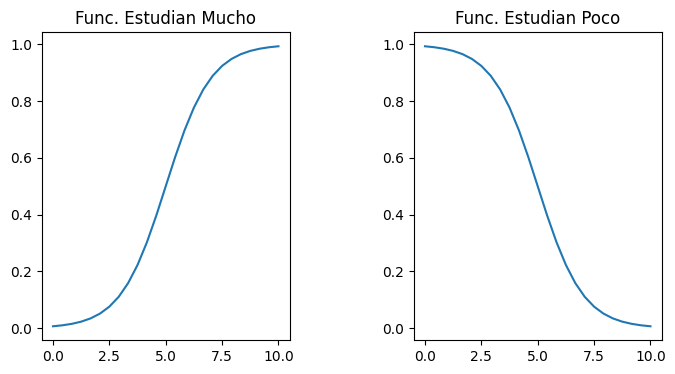

In [ ]:
xA = np.linspace(0, 10, 25)

c=8
e1 = mA = sigmf(c, [1, 5])
e2 = mB = sigmfr(c, [1, 5])
print ("Estusiante que estudia ",c," horas pertenece a los que estudian mucho ",e1)
print ("Estusiante que estudia ",c," horas pertenece a los que estudian poco  ",e2)

mA = sigmf(xA, [1, 5])
mB = sigmfr(xA, [1, 5])


plt.figure(figsize=(8, 4))
# Crear los subplots
plt.subplot(121)
plt.plot(xA, mA)
plt.title("Func. Estudian Mucho")

plt.subplot(122)
plt.plot(xA, mB)
plt.title("Func. Estudian Poco")

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.5)

# Mostrar la figura
plt.show()


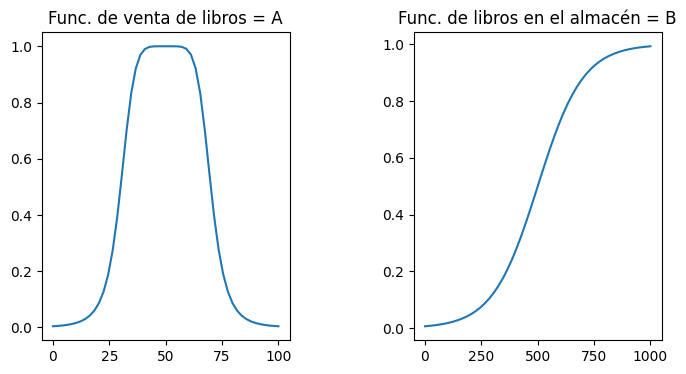

In [ ]:
# Definir el tamaño de la figura
plt.figure(figsize=(8, 4))  # Ajustar el tamaño de la figura

# Generar los datos
# array de 50 elemntos de 0 1 100
# que representa la cantidad de libros vendidos mensualmente
# [0,100] libros vendidos al mes
xA = np.linspace(0, 100, 50)

# Conjunto A = función de Ventas
# campana con punto central en 50,
# ancho de a= 20
# pendiente de b= 3
mA = gbellmf(xA, [20, 3, 50])

# Libros en el almacén [0,1000]
xB = np.linspace(0, 1000, 50)

# Conjunto B = Función de libros en el almacén
mB = sigmf(xB, [0.01, 500])

# Crear los subplots
plt.subplot(121)
plt.plot(xA, mA)
plt.title("Func. de venta de libros = A")

plt.subplot(122)
plt.plot(xB, mB)
plt.title("Func. de libros en el almacén = B")

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.5)

# Mostrar la figura
plt.show()

<Figure size 800x400 with 0 Axes>

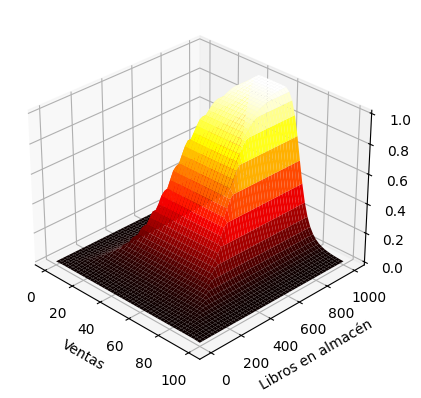

In [ ]:
# Calcular el producto cartesiano
R_AB = cartesian(mA, mB)
A, B = np.meshgrid(xA, xB, indexing='ij')

# Definir el tamaño de la figura
plt.figure(figsize=(8, 4))  # Ajustar el tamaño de la figura

# Crear el subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
ax.plot_surface(A, B, R_AB, cmap=plt.cm.hot)
ax.set_zlim(0, 1)

ax.set_xlabel('Ventas')
ax.set_ylabel('Libros en almacén')
ax.set_zlabel('Relación')

# Ajustar la perspectiva de la vista
ax.view_init(elev=30, azim=-45)

# Mostrar la figura
plt.show()

<h2>Composición de funciones</h2>

In [ ]:
#
# Función compose(): Composición difusa max-min.
# Argumentos:
#   mRA: numpy.ndarray, vector o matriz de relación A
#   mRB: numpy.ndarray, Matriz de relación B
# Retorna:
#   AoB: Matriz de composición max-min
#
def compose(mRA, mRB):

    if mRA.ndim == 1:
        aux = np.zeros(mRA.size)
        AoB = np.zeros(mRB.shape[0])

        for j in range(mRA.size):
            for i in range(mRB.shape[0]):
                aux[i] = min(mRA[i], mRB[i,j])
            AoB[j] = max(aux)

    else:
        if (mRA.shape[1] != mRB.shape[0]):
            return -1
        else:
            aux = np.zeros(mRA.shape[1])
            AoB = np.zeros([mRA.shape[0], mRB.shape[1]])

            for i in range(mRA.shape[0]):
                for k in range(mRB.shape[1]):
                    for j in range(mRA.shape[1]):
                        aux[j] = min(mRA[i,j],mRB[j,k])

                    AoB[i, k] = max(aux)
    return AoB

In [ ]:
#
# Función compose(): Composición difusa max-min.
# Argumentos:
#   mRA: numpy.ndarray, vector o matriz de relación A
#   mRB: numpy.ndarray, Matriz de relación B
# Retorna:
#   AoB: Matriz de composición max-min
#
x = np.array([[0.4, 1.0, 0.2],
              [0.1, 0.0, 0.5],
              [0.9, 0.7, 0.8]])

y = np.array([[1.0, 0.6, 0.5, 0.4, 0.0],
              [0.4, 0.8, 0.7, 0.3, 0.3],
              [0.5, 1.0, 0.5, 0.2, 0.8]])

# En el siguiente ejemplo se muestra la construción
# de la composición RA (A,B) con RB (B,C)

compose(x, y)

array([[0.4, 0.8, 0.7, 0.4, 0.3],
       [0.5, 0.5, 0.5, 0.2, 0.5],
       [0.9, 0.8, 0.7, 0.4, 0.8]])

<h2>Más sobre composición de funciones</h2>

In [ ]:
# Sea el siguiente universo del discurso
# para los conjuntos x e y

x = np.linspace(0, 1, 50)
y = np.linspace(0, 5, 50)

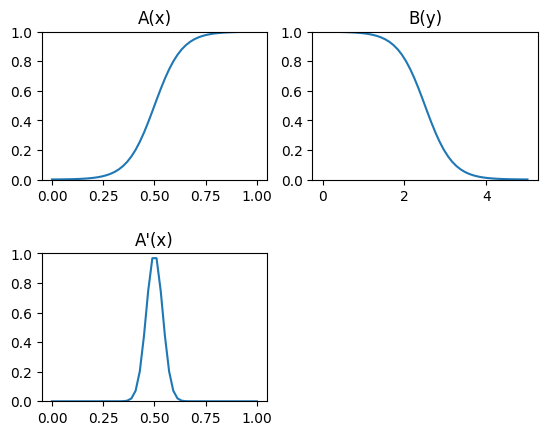

In [ ]:
# Definimos Funciones de pertenencia A(x), B(y) y Ap(x)

A = sigmf(x, [15, 0.5])
plt.subplot(221)
plt.title('A(x)')
plt.ylim((0, 1))
plt.plot(x, A)

B = sigmf(y, [-3, 2.5])
plt.subplot(222)
plt.title('B(y)')
plt.ylim((0, 1))
plt.plot(y, B)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

# A'(x) está definida en el mismo universo que A(x)
Ap = gaussmf(x, [0.04, 0.5])
plt.subplot(223)
plt.title('A\'(x)')
plt.ylim((0, 1))
plt.plot(x, Ap)

<Figure size 800x400 with 0 Axes>

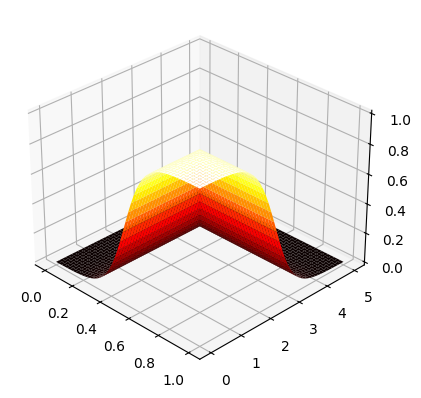

In [ ]:
# Calculamo el producto cartesiano de las funciones A x B
AxB = cartesian(A, B)
rA, rB = np.meshgrid(x, y, indexing='ij')

# Definir el tamaño de la figura
plt.figure(figsize=(8, 4))  # Ajustar el tamaño de la figura

# Crear el subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
ax.plot_surface(rA, rB, AxB, cmap=plt.cm.hot)
ax.set_zlim(0, 1)

# Ajustar la perspectiva de la vista
ax.view_init(elev=30, azim=-45)

# Mostrar la figura
plt.show()

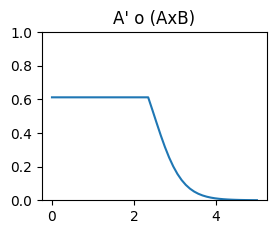

In [ ]:
# Seguidamente componemos la relación de A' con el producto AxB
Bp = compose(Ap, AxB)
plt.subplot(224)
plt.title('A\' o (AxB)')
plt.ylim((0, 1))
plt.plot(y, Bp)

plt.show()


<h2> Definición de variables lingüísticas</h2>
<h3>Posesión de balón</h3>

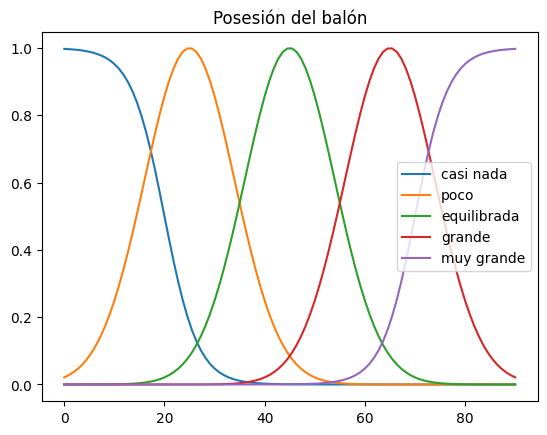

Para una posesión de  50  minutos la pcn(x) es  0.00012339457598623172
Para una posesión de  50  minutos la pp(x) es  0.02110965645367106
Para una posesión de  50  minutos la pe(x) es  0.8569968914352789
Para una posesión de  50  minutos la pg(x) es  0.24935220877729616
Para una posesión de  50  minutos la pmg(x) es  0.0024726231566347743


In [ ]:
# Definimos 100 casos para la posesión del balón
# de 0 a 90 minutos
x = np.linspace(0, 90, 100)
pcn = sigmf(x, [-0.3, 20]) # posesión casi nada
pp = gaussmf(x,[9,25]) # posesión poco
pe = gaussmf(x,[9,45]) # posesión equilibrada
pg = gaussmf(x,[9,65]) # posesión grande
pmg = sigmf(x, [0.3, 70]) # posesión casi nada

# ploteamos
plt.title('Posesión del balón')
plt.plot(x, pcn,label='casi nada')
plt.plot(x, pp,label='poco')
plt.plot(x, pe,label='equilibrada')
plt.plot(x, pg,label='grande')
plt.plot(x, pmg,label='muy grande')
plt.legend()
plt.show()

xtest = 50
print("Para una posesión de ",xtest," minutos la pcn(x) es ",sigmf(xtest, [-0.3, 20]))
print("Para una posesión de ",xtest," minutos la pp(x) es ",gaussmf(xtest,[9,25]))
print("Para una posesión de ",xtest," minutos la pe(x) es ",gaussmf(xtest,[9,45]))
print("Para una posesión de ",xtest," minutos la pg(x) es ",gaussmf(xtest,[9,65]))
print("Para una posesión de ",xtest," minutos la pmg(x) es ",sigmf(xtest, [0.3, 70]))

<h3>Ejercicio del estudiante</h3>

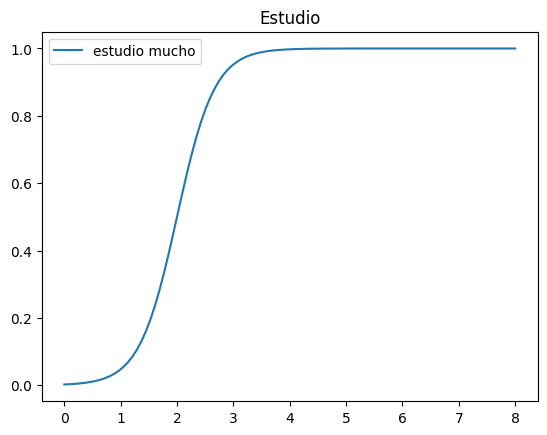

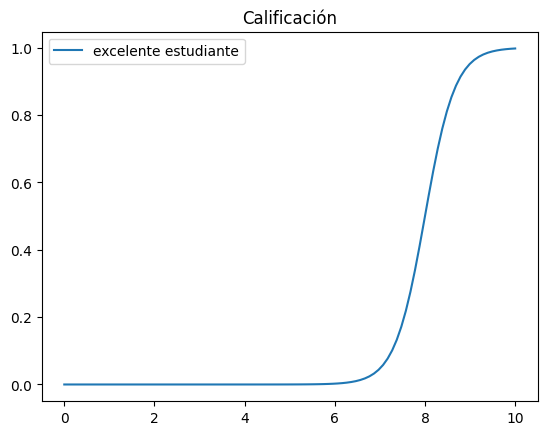

Para un estudio de  3  horas la em(x) es  0.9525741268224334
Para una calificación de  8  la ee(y) es  0.5


In [ ]:
# Definimos 100 casos para estudio
# de 0 a 8 horas de estudio diarias
x = np.linspace(0, 8, 100)

# Definimos 100 casos de calificaciones
# de 0 a 10
y = np.linspace(0, 10, 100)

# Definimos funciones de pertenencia
em = sigmf(x, [3, 2]) # estudio mucho

ee = sigmf(y, [3, 8]) # excelente estudiante

# ploteamos
plt.title('Estudio')
plt.plot(x, em,label='estudio mucho')
plt.legend()
plt.show()

plt.title('Calificación')
plt.plot(y, ee,label='excelente estudiante')
plt.legend()
plt.show()

xtest = 3
ytest = 8
print("Para un estudio de ",xtest," horas la em(x) es ",sigmf(xtest, [3, 2]))
print("Para una calificación de ",ytest," la ee(y) es ",sigmf(ytest, [3, 8]))